In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [2]:
x = np.array([  8,  13, 18,  23, 28, 33, 38, 48, 58, 108, 158])
n = np.array([185, 104, 91, 102, 94, 89, 83, 79, 92,  74,  87])
t = np.array([61.3442, 60.8798, 60.6766, 61.0395, 60.6912, 60.5751,
             61.0104, 60.5460, 60.8508, 61.0106, 66.9896])
N = n/t*60
print(N)

[180.94620192 102.49705157  89.98526615 100.26294449  92.9294527
  88.155034    81.6254278   78.28758299  90.71368002  72.77423923
  77.9225432 ]


In [3]:
n_min = np.array([272, 114, 106, 112, 115, 98, 94, 92, 119, 96, 125])
N_min = n_min/t*60
n_plus = np.array([138, 95, 84, 95, 75, 84, 80, 74, 82, 66, 76])
N_plus = n_plus/t*60
sN_top = N_min - N
sN_put = N - N_plus
sN = np.array([sN_put, sN_top])

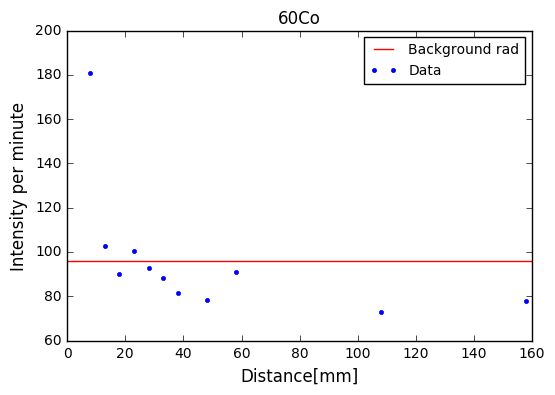

In [4]:
fig = plt.figure()
plt.errorbar(x, N, fmt = '.', label = 'Data')
plt.axhline(96, color = 'r', label = 'Background rad')
#plt.errorbar(x, N, sN,fmt = '.')
#plt.errorbar(x, N_min, fmt = '.')
#plt.errorbar(x, N_plus, fmt = '.')
plt.xlabel("Distance[mm]", fontsize = 12)
plt.ylabel("Intensity per minute", fontsize = 12)
plt.legend(fontsize = 10)
plt.title("60Co")
plt.show()

In [5]:
sN = np.sqrt(N)
def model(x, A, b):
    #x = np.array(x)
    return( A / x**2 + b)

som = 0
for i in range(len(x)):
    som = som + N[i]*x[i]**2
a = som/len(x)

x0 = [a, 72.77423923]
def chi2(x,y,param,s):
    diff = y - model(x,param[0], param[1])
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(x, N, param, sN)

result = opt.minimize(chi2ftie,x0)
A, b = result.x
print(A, b)

v = len(x) - len([A, b])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([A, b]), v)
print(str(pwaarde*100)+"%")

6055.777483873313 78.81595055300977
75.36220929533974%


In [6]:
f = lambda a: chi2(x, N, [a,b], sN) - chi2(x, N, [A,b], sN) - 1
A1 = opt.fsolve(f,5500)[0]
A2 = opt.fsolve(f,6500)[0]
sA1 = A-A1
sA2 = A2-A
print(A1,A,A2)
print(sA1,sA2)
print(sA1/A,sA2/A)
print("-----")
f = lambda B: chi2(x, N, [A,B], sN) - chi2(x, N, [A,b], sN) - 1
B1 = opt.fsolve(f,70)[0]
B2 = opt.fsolve(f,90)[0]
sB1 = b-B1
sB2 = B2-b
print(B1,b,B2)
print(sB1,sB2)
print(sB1/b,sB2/b)

5324.267742288227 6055.777483873313 6787.284247161005
731.509741585086 731.5067632876917
0.12079534684573777 0.1207948550348345
-----
75.94228088119166 78.81595055300977 81.68958123101403
2.8736696718181065 2.873630678004261
0.03646050896620657 0.03646001422099863


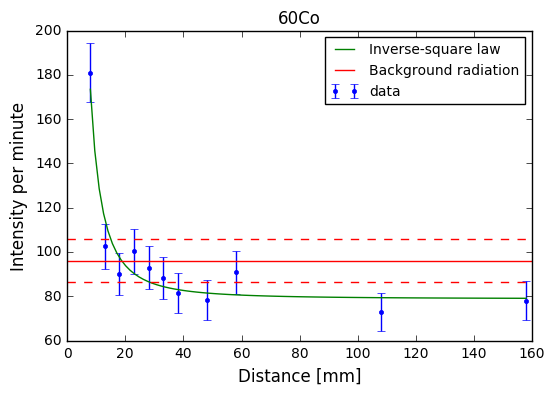

In [10]:
xI = np.linspace(x.min(), x.max(), 100)

fig = plt.figure()
plt.errorbar(x, N, sN, fmt = '.', label = "data")
plt.plot(xI, model(xI, A, b), label = "Inverse-square law")
plt.xlabel("Distance [mm]", fontsize = 12)
plt.ylabel("Intensity per minute", fontsize = 12)
plt.axhline(96, color = 'r', label = 'Background radiation')
plt.axhline(96 - np.sqrt(96), color = 'r', linestyle = '--')
plt.axhline(96 + np.sqrt(96), color = 'r', linestyle = '--')
plt.legend(fontsize = 10)
plt.title("60Co")
#fig.savefig('60Co.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [8]:
N_2 = n / t
sN_2 = np.sqrt(N_2/t)
print(N_2)
print(sN_2)

[3.01577003 1.70828419 1.49975444 1.67104907 1.54882421 1.46925057
 1.3604238  1.30479305 1.51189467 1.21290399 1.29870905]
[0.22172382 0.16751105 0.15721698 0.16545851 0.15974902 0.15574025
 0.14932591 0.14680069 0.15762592 0.14099722 0.13923623]


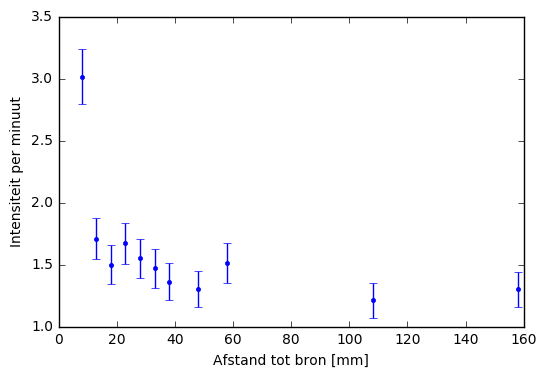

In [9]:
fig = plt.figure()
plt.errorbar(x, N_2, sN_2, fmt = '.')
plt.xlabel("Afstand tot bron [mm]")
plt.ylabel("Intensiteit per minuut")
plt.show()

In [10]:
def model2(x, A, b):
    #x = np.array(x)
    return( A / x**2 + b)


som = 0
for i in range(len(x)):
    som = som + N_2[i]*x[i]**2
a = som/len(x)
l = len(x)
a = N_2[l-1]*x[l-1]**2
x0 = [a, 1.21290399]
print(x0)
def chi2(x,y,param,s):
    diff = y - model2(x, param[0], param[1])
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(x, N_2, param, sN_2)

result = opt.minimize(chi2ftie,x0)
A, b = result.x
print(A, b)

v = len(x) - len([A, b])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([A, b]), v)
print(str(pwaarde*100)+"%")

[32420.97280771941, 1.21290399]
101.0242445339441 1.3132631926538962
74.48460205899082%


In [11]:
f = lambda a: chi2(x, N_2, [a,b], sN_2) - chi2(x, N_2, [A,b], sN_2) - 1
A1 = opt.fsolve(f,50)[0]
A2 = opt.fsolve(f,150)[0]
sA1 = A-A1
sA2 = A2-A
print(A1,A,A2)
print(sA1,sA2)
print(sA1/A,sA2/A)
print("-----")
f = lambda B: chi2(x, N_2, [A,B], sN_2) - chi2(x, N_2, [A,b], sN_2) - 1
B1 = opt.fsolve(f,0)[0]
B2 = opt.fsolve(f,3)[0]
sB1 = b-B1
sB2 = B2-b
print(B1,b,B2)
print(sB1,sB2)
print(sB1/b,sB2/b)

88.95289483756122 101.0242445339441 113.09560616303288
12.071349696382882 12.071361629088784
0.11948963095019151 0.11948974906744106
-----
1.2659520538501319 1.3132631926538962 1.3605743473425012
0.04731113880376436 0.04731115468860492
0.03602563375598464 0.03602564585168689


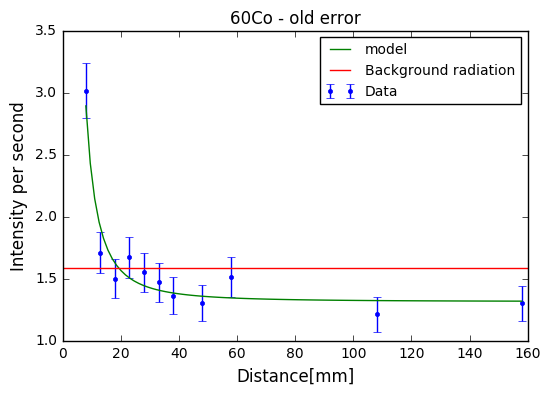

In [12]:
fig = plt.figure()
plt.errorbar(x, N_2, sN_2, fmt = '.', label = "Data")
plt.plot(xI, model2(xI, A, b), label = "model")
#plt.plot(xI, model2(xI, a))
plt.xlabel("Distance[mm]", fontsize = 12)
plt.ylabel("Intensity per second", fontsize = 12)
plt.axhline(96/60.7057, color = 'r', label = "Background radiation")
sBKG = np.sqrt((96/60.7057)/60.7057)
#plt.axhline(96/60.7057+sBKG, color = 'r', linestyle = '--', label = "error on Bkg-rad")
#plt.axhline(96/60.7057-sBKG, color = 'r', linestyle = '--')
plt.legend(fontsize = 10)
plt.title("60Co - old error")
plt.show()